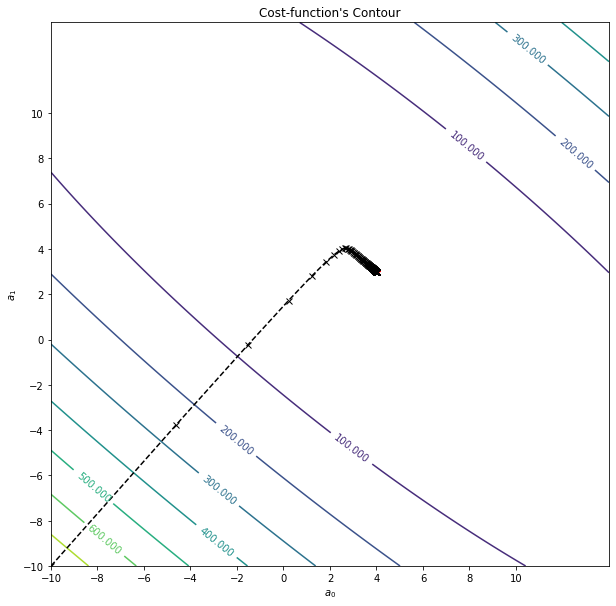

a0_opt: 4.002926759392558
a1_opt: 2.995826910807608
a0: 4.002926759392549
a1: 2.9958269108076165


In [45]:
import numpy as np
import matplotlib.pyplot as plt

M = 10000

X = 2 * np.random.rand(M, 1)
y = 4 + 3 * X + np.random.randn(M, 1)

X_b = np.c_[np.ones((M, 1)), X]  # add x0 = 1 to each instance

# Generate values for parameters.
N = 200
a0 = np.linspace(-10.0, 14.0, N)
a1 = np.linspace(-10.0, 14.0, N)

A0, A1 = np.meshgrid(a0, a1)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    
    for iter2 in range(0, N):
        
        yhat = A0[iter1][iter2] + A1[iter1][iter2]*X
    
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  )
        
        
# Closed-form solution.
X = X_b

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))

yhat = a_opt[0, 0] + a_opt[1, 0]*X

Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )


# Gradient descent solution.
alpha = 0.1  # learning rate
n_iterations = 10000

a_hist = np.zeros((2, n_iterations+1))

# Random initialization of parameters.
a[0] = -10;
a[1] = -10;

a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

for iteration in range(n_iterations):
    gradients = -2/M * X_b.T.dot(y - X_b.dot(a))
    a = a - alpha * gradients
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]


# Plot Figure.        
fig = plt.figure(figsize=(10,10))

cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$')
plt.ylabel('$a_1$')
plt.title('Cost-function\'s Contour')

plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx--')

plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

# Print found values.
print('a0_opt: ' + str(a_opt[0, 0]))
print('a1_opt: ' + str(a_opt[1, 0]))

print('a0: ' + str(a[0, 0]))
print('a1: ' + str(a[1, 0]))
